# Unsupervised Learning

- Supervised Learning: Using historical labeled data, predict a label on new data(regression or classification).

- Unsupervised Learning: Using unlabeled data, discover patterns, clusters, or significant components.
    - Clustering: If we have unlabeled data, can we attempt to cluster or group similar data points together to “discover” possible labels for clusters?
    - Dimensionality Reduction: If we have unlabeled data, can we attempt to reduce the number of features by combining them into new components? Do these new components give us further insight for the data?
---
- Instead of metrics like RMSE or Accuracy, we will need to figure out other ways of assessing unsupervised model performance or reasonableness.
- Questions to keep in mind:
    - What does it really mean to “discover” labels through clustering?
    - Without known labels how do we measure performance?
    - Do combinations of features hold important insights? 
---

## K-Means Clustering

_Inventors: Hugo Steinhaus, Stuart Lloyd of Bell Labs, James MacQueen of UCLA_

### Clustering

- Clustering uses unlabeled data and looks for similarities between groups (clusters) in order to attempt to segment the data into separate clusters.

- If we’ve discovered these new cluster labels, could we use that as a y for supervised training? Yes! We can use unsupervised learning to discover possible labels, then apply supervised learning on new data points.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Example #1 : Bank Client

### Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].
     
    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [91]:
df = pd.read_csv('data/bank-full.csv')
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
19970,38,technician,married,professional.course,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
22702,36,technician,single,university.degree,no,no,no,cellular,aug,fri,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
14112,45,management,married,university.degree,unknown,yes,yes,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
36362,34,technician,married,university.degree,no,yes,no,cellular,jun,tue,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes
4507,32,services,married,professional.course,no,yes,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### EDA

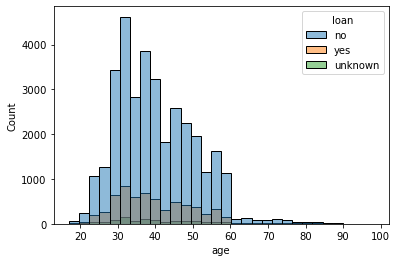

In [5]:
sns.histplot(data=df, x='age', bins=30, hue='loan'); 
# there are three catagories of loan

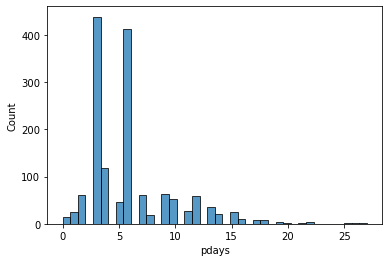

In [12]:
sns.histplot(data=df[df['pdays']!=999], x='pdays', bins=40); 
# 999 is just a placeholder

(0.0, 1000.0)

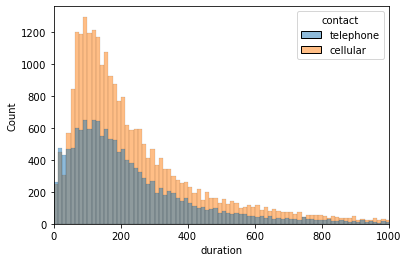

In [11]:
sns.histplot(data=df, x='duration', hue='contact');
plt.xlim(0,1000)
# most of the high duration calls were made on cellphones

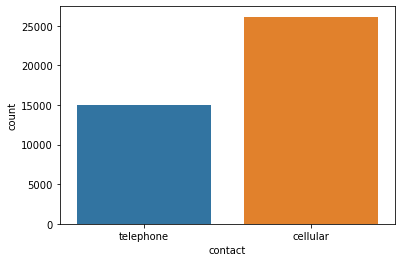

In [14]:
sns.countplot(data=df, x='contact');
# as expected people chose cellphones over telephones

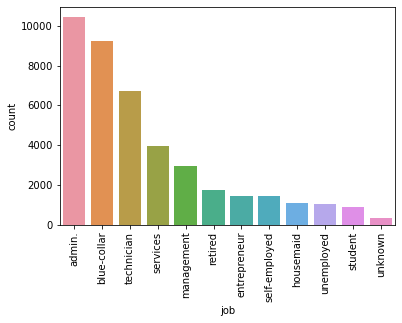

In [21]:
sns.countplot(data=df, x='job', order=df.job.value_counts().index);
plt.xticks(rotation=90);
# most of the customers are admins or blue-collars

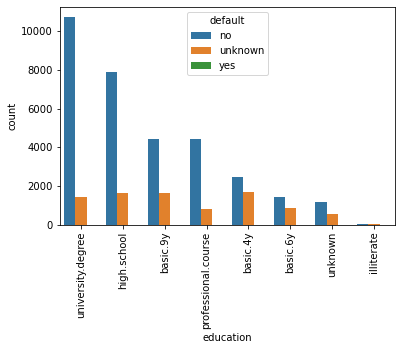

In [29]:
sns.countplot(data=df, x='education', 
              order=df.education.value_counts().index,
              hue='default');
plt.xticks(rotation=90);

In [27]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [30]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

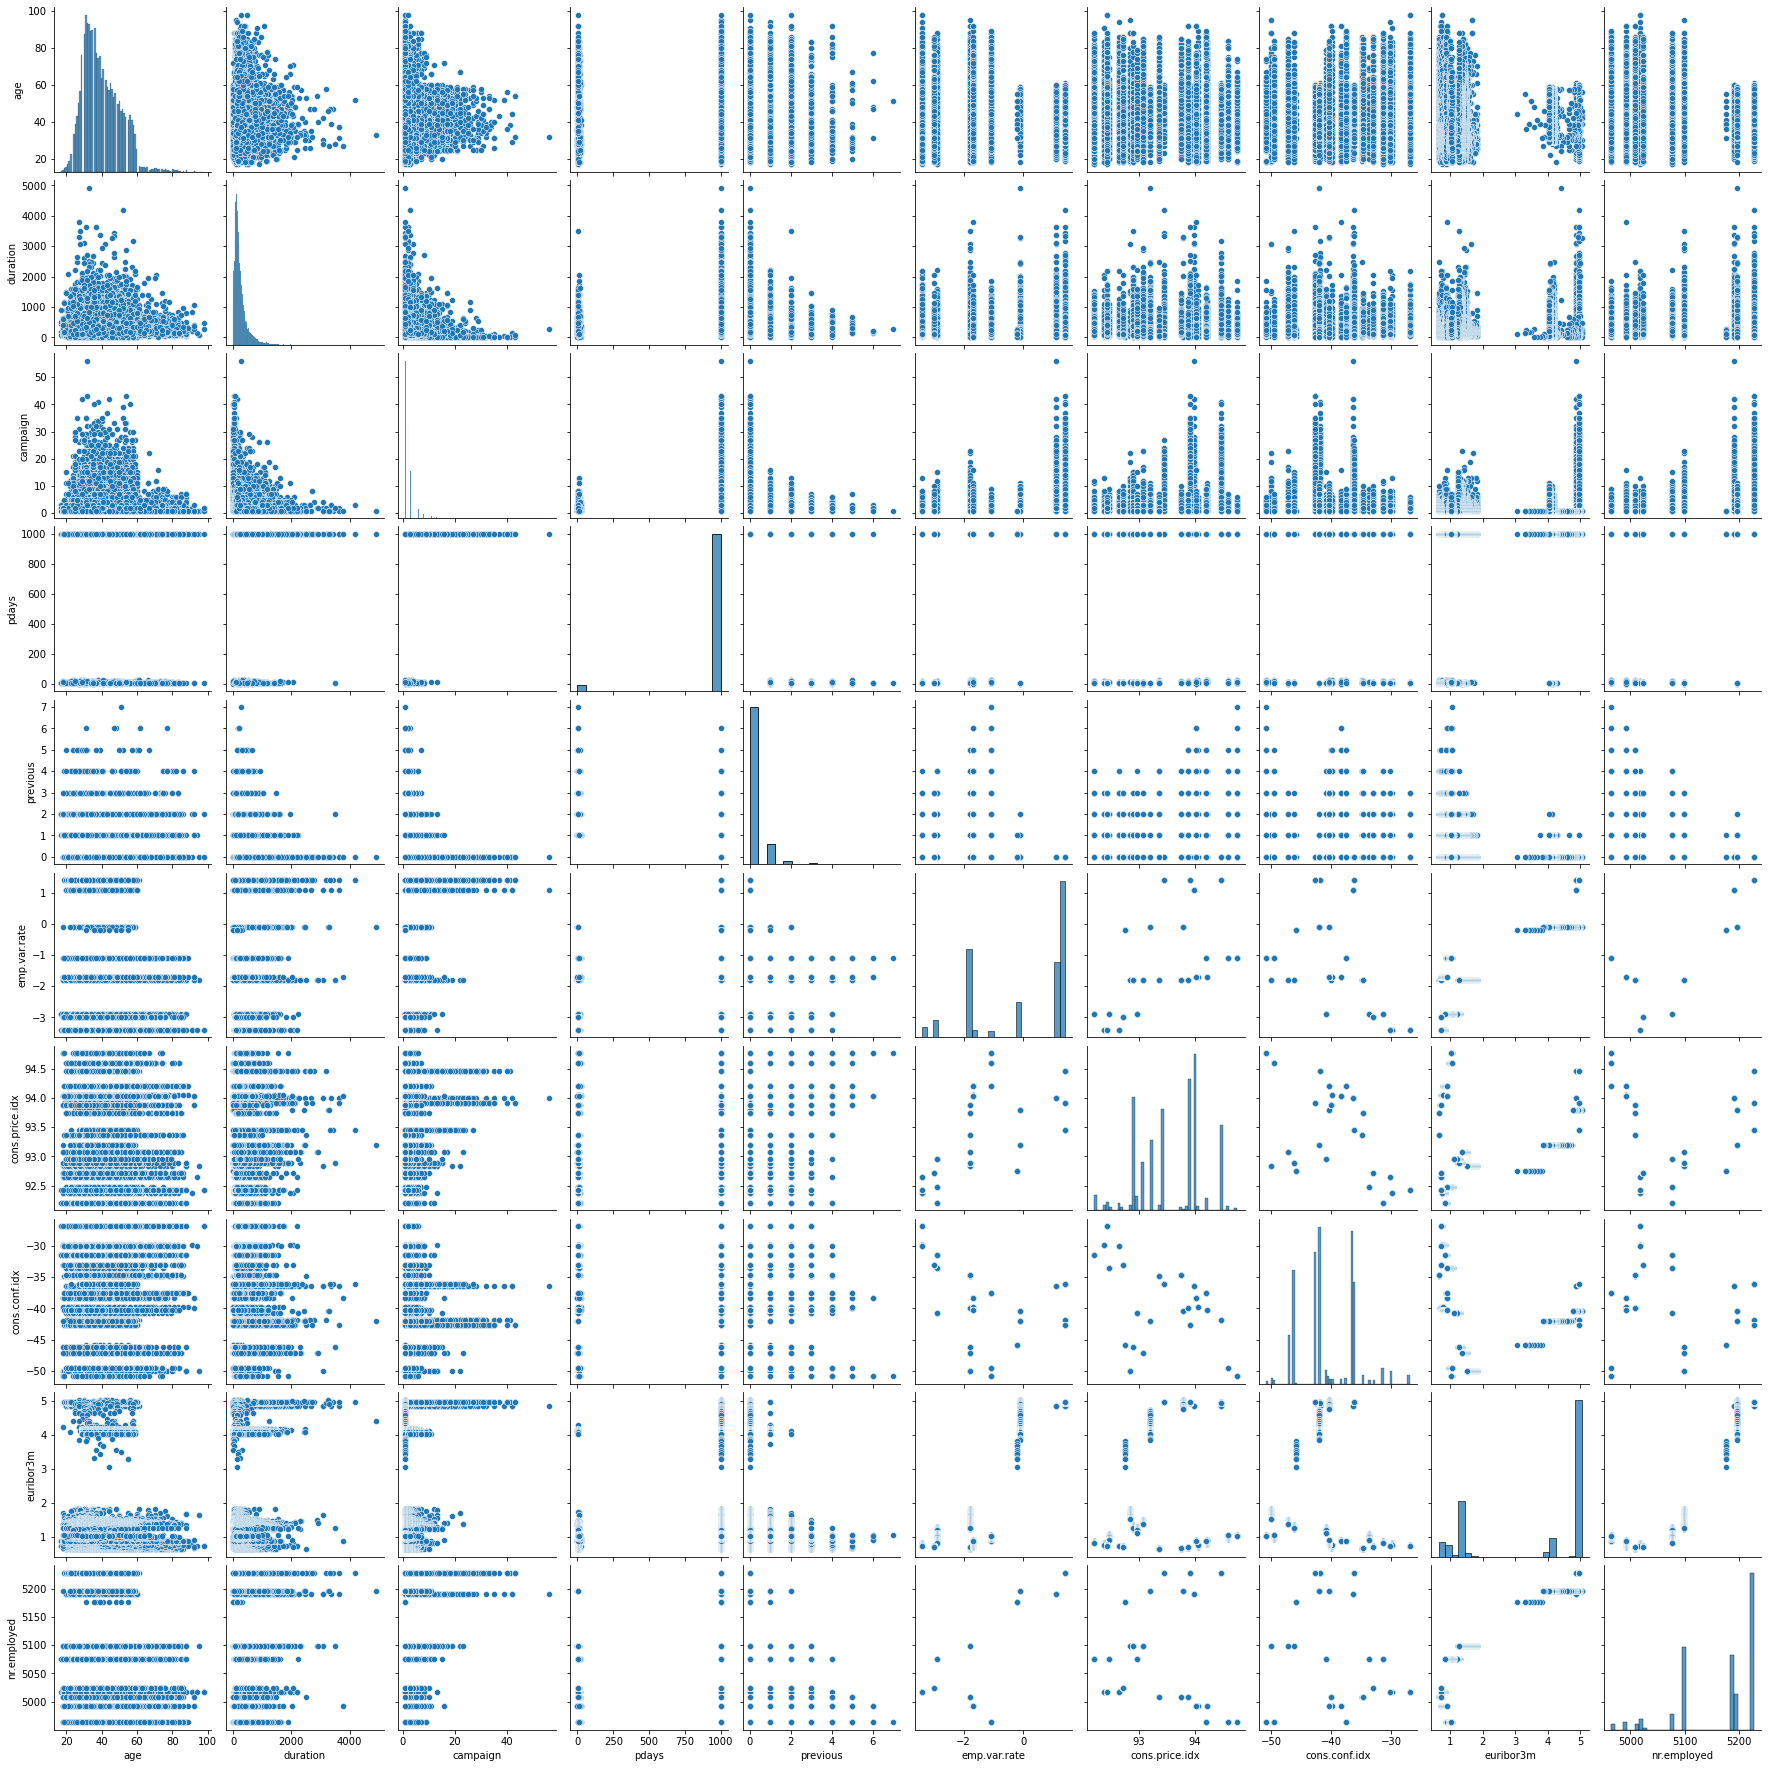

In [31]:
sns.pairplot(df);

### K-Means

_UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST_

We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.

In [83]:
X = pd.get_dummies(df)

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
# model.fit and model.predict in the same step
# It is a usual thing in Unsupervised Learning
# predict is not any kinda prediction but
# merely assignment to a cluster
cluster_labels = model.fit_predict(X_scaled)

In [84]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [85]:
X['Cluster'] = cluster_labels
# Addying a label

In [86]:
X.sample(10)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
10823,31,48,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,1,0,1,0,1,0,0
3667,53,317,1,999,0,1.1,93.994,-36.4,4.859,5191.0,...,0,0,0,0,0,1,0,1,0,0
27865,33,163,1,999,0,-1.8,92.843,-50.0,1.602,5099.1,...,0,0,0,1,0,1,0,1,0,1
30999,39,209,5,999,1,-1.8,92.893,-46.2,1.344,5099.1,...,0,0,1,0,1,0,0,1,0,1
38652,28,179,1,999,0,-3.4,92.649,-30.1,0.720,5017.5,...,0,0,1,0,0,1,0,0,1,1
39448,53,398,2,999,0,-1.8,93.749,-34.6,0.644,5008.7,...,0,0,1,0,0,1,0,0,1,1
1303,30,249,2,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,1,0,0,0,1,0,1,0,0
38040,42,230,3,999,0,-3.4,92.379,-29.8,0.778,5017.5,...,0,1,0,0,0,1,0,0,1,1
21779,29,216,1,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,1,0,1,0,1,0,0
8098,50,205,2,999,0,1.4,94.465,-41.8,4.865,5228.1,...,1,0,0,0,0,1,0,1,0,0


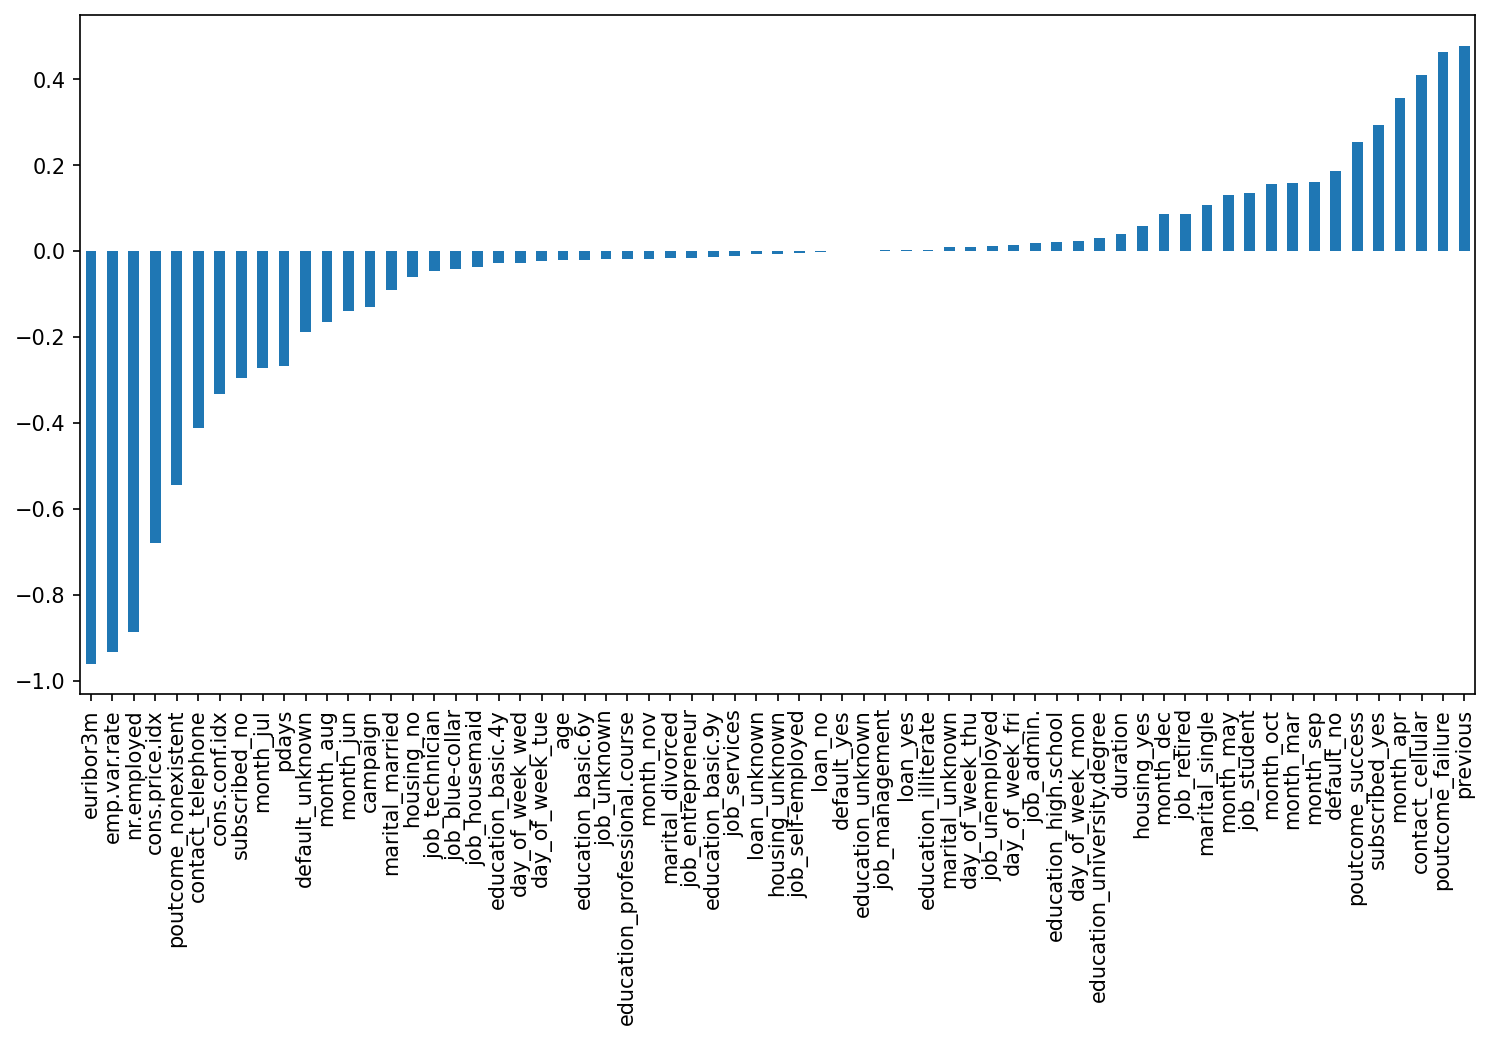

In [87]:
plt.figure(figsize=(12,6), dpi=150)
X.corr()['Cluster'][:-1].sort_values().plot(kind='bar');

So based on two clusters we have such correlation. Now we need domain know-how to make sense of it.

#### Elbow Method

How do we choose a reasonable value for K number of clusters? Is there any way we can evaluate how good our current K value is at determining clusters? 
- We could measure the sum of the distances (SSD) from points to cluster centers
- We keep track of this SSD value for a range of different K values.
- We then look for a K value where rate of reduction in SSD begins to decline.
- This signifies that adding an extra cluster is not obtaining enough clarity of cluster separation to justify increasing K.
- These points are strong indicators that increasing K further is no longer justified as it is not revealing more “signal”.
You can also measure out this SSD in a barplot.

    ```
    model = KMeans()
    model.inertia_ # SSD
    ```
    <img src='images/KM1.png' width='200'> <img src='images/KM2.png' width='200'> <img src='images/KM3.png' width='210'>

In [88]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

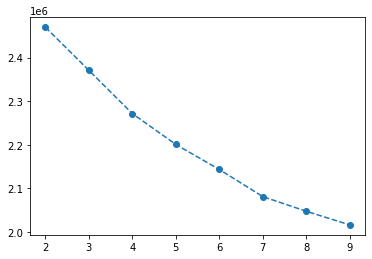

In [89]:
plt.plot(range(2,10), ssd, 'o--');

In [90]:
pd.Series(ssd).diff()

0             NaN
1   -99005.460726
2   -99282.043452
3   -70810.686948
4   -57441.845728
5   -62234.972545
6   -33681.846933
7   -31302.468513
dtype: float64

- k=6 would be fine
---

## Example #2 : Color Quantization (Image Segmentation)

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# .jpg, .png --> numpy array
import matplotlib.image as mpimg

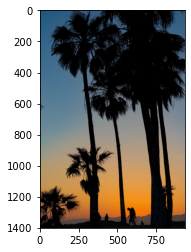

In [100]:
image_as_array = mpimg.imread('data/palm_trees.jpg')
plt.imshow(image_as_array);

In [103]:
# (H,W,C) --> (H*W,C)
(h,w,c) = image_as_array.shape
image_as_array2d = image_as_array.reshape((h*w,c))

In [124]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)
labels = model.fit_predict(image_as_array2d)

In [125]:
rgb_codes = model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[  2,   2,   3],
       [137, 144, 146],
       [158,  99,  58],
       [ 56,  97, 130],
       [208, 154,  89],
       [ 29,  32,  37],
       [175, 155, 127],
       [229, 136,  36],
       [ 72,  67,  68],
       [ 92, 124, 146]])

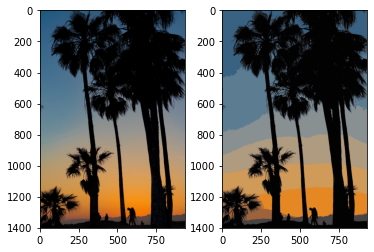

In [126]:
quantized_image = rgb_codes[labels]
# This is very smart!

fig, ax = plt.subplots(ncols=2, nrows=1)
ax[0].imshow(image_as_array);
ax[1].imshow(quantized_image.reshape((h,w,c)));

## Example #3: Using Clustering for Preprocessing

In [1]:
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.96

- OK, that’s our baseline: 96% accuracy. Let’s see if we can do better by
using K-Means as a preprocessing step. We will create a pipeline that will
first cluster the training set into 50 clusters and replace the images with
their distances to these 50 clusters, then apply a Logistic Regression model:

In [7]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline 
 
pipeline = Pipeline([ 
    ("kmeans", KMeans(n_clusters=50)), 
    ("log_reg", LogisticRegression(max_iter=100000)),
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.98

- Further boost accuracy using GridSearchCV for best number of clusters

In [12]:
from sklearn.model_selection import GridSearchCV 
 
param_grid = dict(kmeans__n_clusters=range(10, 201, 10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=4)
grid_clf.fit(X_train, y_train)
grid_clf.best_params_
grid_clf.score(X_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[CV] kmeans__n_clusters=10 ...........................................
[CV] kmeans__n_clusters=10 ...........................................
[CV] kmeans__n_clusters=20 ...........................................
[CV] kmeans__n_clusters=10 ...........................................
[CV] ............................ kmeans__n_clusters=20, total=  12.7s
[CV] kmeans__n_clusters=20 ...........................................
[CV] ............................ kmeans__n_clusters=10, total=  13.9s
[CV] kmeans__n_clusters=20 ...........................................
[CV] ............................ kmeans__n_clusters=10, total=  14.0s
[CV] kmeans__n_clusters=30 ...........................................
[CV] ............................ kmeans__n_clusters=10, total=  18.6s
[CV] kmeans__n_clusters=30 ...........................................
[CV] ............................ kmeans__n_clusters=30, total=   9.0s
[CV] kmeans__n_clusters=30 ...........................................


/home/jigar/anaconda3/envs/dataScienceEnv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................ kmeans__n_clusters=20, total=  18.7s
[CV] kmeans__n_clusters=40 ...........................................


/home/jigar/anaconda3/envs/dataScienceEnv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................ kmeans__n_clusters=20, total=  20.0s
[CV] kmeans__n_clusters=40 ...........................................
[CV] ............................ kmeans__n_clusters=30, total=  17.4s
[CV] kmeans__n_clusters=40 ...........................................
[CV] ............................ kmeans__n_clusters=30, total=  13.2s
[CV] kmeans__n_clusters=50 ...........................................
[CV] ............................ kmeans__n_clusters=40, total=  10.1s
[CV] kmeans__n_clusters=50 ...........................................
[CV] ............................ kmeans__n_clusters=50, total=   7.9s
[CV] kmeans__n_clusters=50 ...........................................
[CV] ............................ kmeans__n_clusters=40, total=  10.1s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=40, total=  15.5s
[CV] kmeans__n_clusters=60 ...........................................
[CV] .

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.7min


[CV] ........................... kmeans__n_clusters=120, total=   7.0s
[CV] kmeans__n_clusters=130 ..........................................
[CV] ........................... kmeans__n_clusters=120, total=   7.9s
[CV] kmeans__n_clusters=130 ..........................................
[CV] ........................... kmeans__n_clusters=120, total=  10.4s
[CV] kmeans__n_clusters=140 ..........................................
[CV] ........................... kmeans__n_clusters=130, total=   8.1s
[CV] kmeans__n_clusters=140 ..........................................
[CV] ........................... kmeans__n_clusters=130, total=  11.9s
[CV] kmeans__n_clusters=140 ..........................................
[CV] ........................... kmeans__n_clusters=130, total=  15.1s
[CV] kmeans__n_clusters=150 ..........................................
[CV] ........................... kmeans__n_clusters=140, total=   9.8s
[CV] kmeans__n_clusters=150 ..........................................
[CV] .

/home/jigar/anaconda3/envs/dataScienceEnv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  3.1min finished


[CV] ........................... kmeans__n_clusters=190, total=  34.1s


0.9822222222222222